In [2]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
#import missingno as missing
import seaborn as sns
sns.set_style('whitegrid')
#%matplotlib inline

import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
#from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#

df = pd.read_csv("b_depressed.csv")

# preview the data
df.head()


df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
Survey_id                1429 non-null int64
Ville_id                 1429 non-null int64
sex                      1429 non-null int64
Age                      1429 non-null int64
Married                  1429 non-null int64
Number_children          1429 non-null int64
education_level          1429 non-null int64
total_members            1429 non-null int64
gained_asset             1429 non-null int64
durable_asset            1429 non-null int64
save_asset               1429 non-null int64
living_expenses          1429 non-null int64
other_expenses           1429 non-null int64
incoming_salary          1429 non-null int64
incoming_own_farm        1429 non-null int64
incoming_business        1429 non-null int64
incoming_no_business     1429 non-null int64
incoming_agricultural    1429 non-null int64
farm_expenses            1429 non-null int64
labor_primary            1429 non-null

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [12]:
len(df.keys())

23

In [11]:
np.where(np.isnan(df.values))

(array([  51,   75,  143,  149,  253,  273,  364,  387,  595,  644,  720,
         753,  801, 1034, 1055, 1085, 1122, 1139, 1337, 1400]),
 array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21]))

In [70]:
df.keys()[21]

'no_lasting_investmen'

In [24]:
df.values[:,21]

array([28292707., 28292707., 28292707., ..., 10454478., 28292707.,
       13012488.])

In [23]:
np.isnan(df.values[:, 21]).any()

True

In [26]:
np.isnan(df.no_lasting_investmen).any()

True

In [53]:
X = df.drop(columns=['depressed', 'no_lasting_investmen'])
y = df.depressed

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#20% better

In [56]:
fit = RandomForestClassifier().fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


697     0
1312    0
436     0
143     0
1367    1
       ..
469     0
852     0
1083    0
592     0
808     0
Name: depressed, Length: 143, dtype: int64

In [61]:
np.sum(fit.predict(X_test)==y_test)/len(y_test)

0.8531468531468531

In [68]:
fit.predict([[115,1,22,1,3,9,5,28922201,22261940,23399979,26652283,28243066,0,0,0,0,30428818,31363432,0,28411718,28292707]])

array([1])

1429

In [34]:
np.sum(fit.predict(df.drop(columns=['depressed', 'no_lasting_investmen']))==df.depressed)/len(df.depressed)

0.9755073477956613

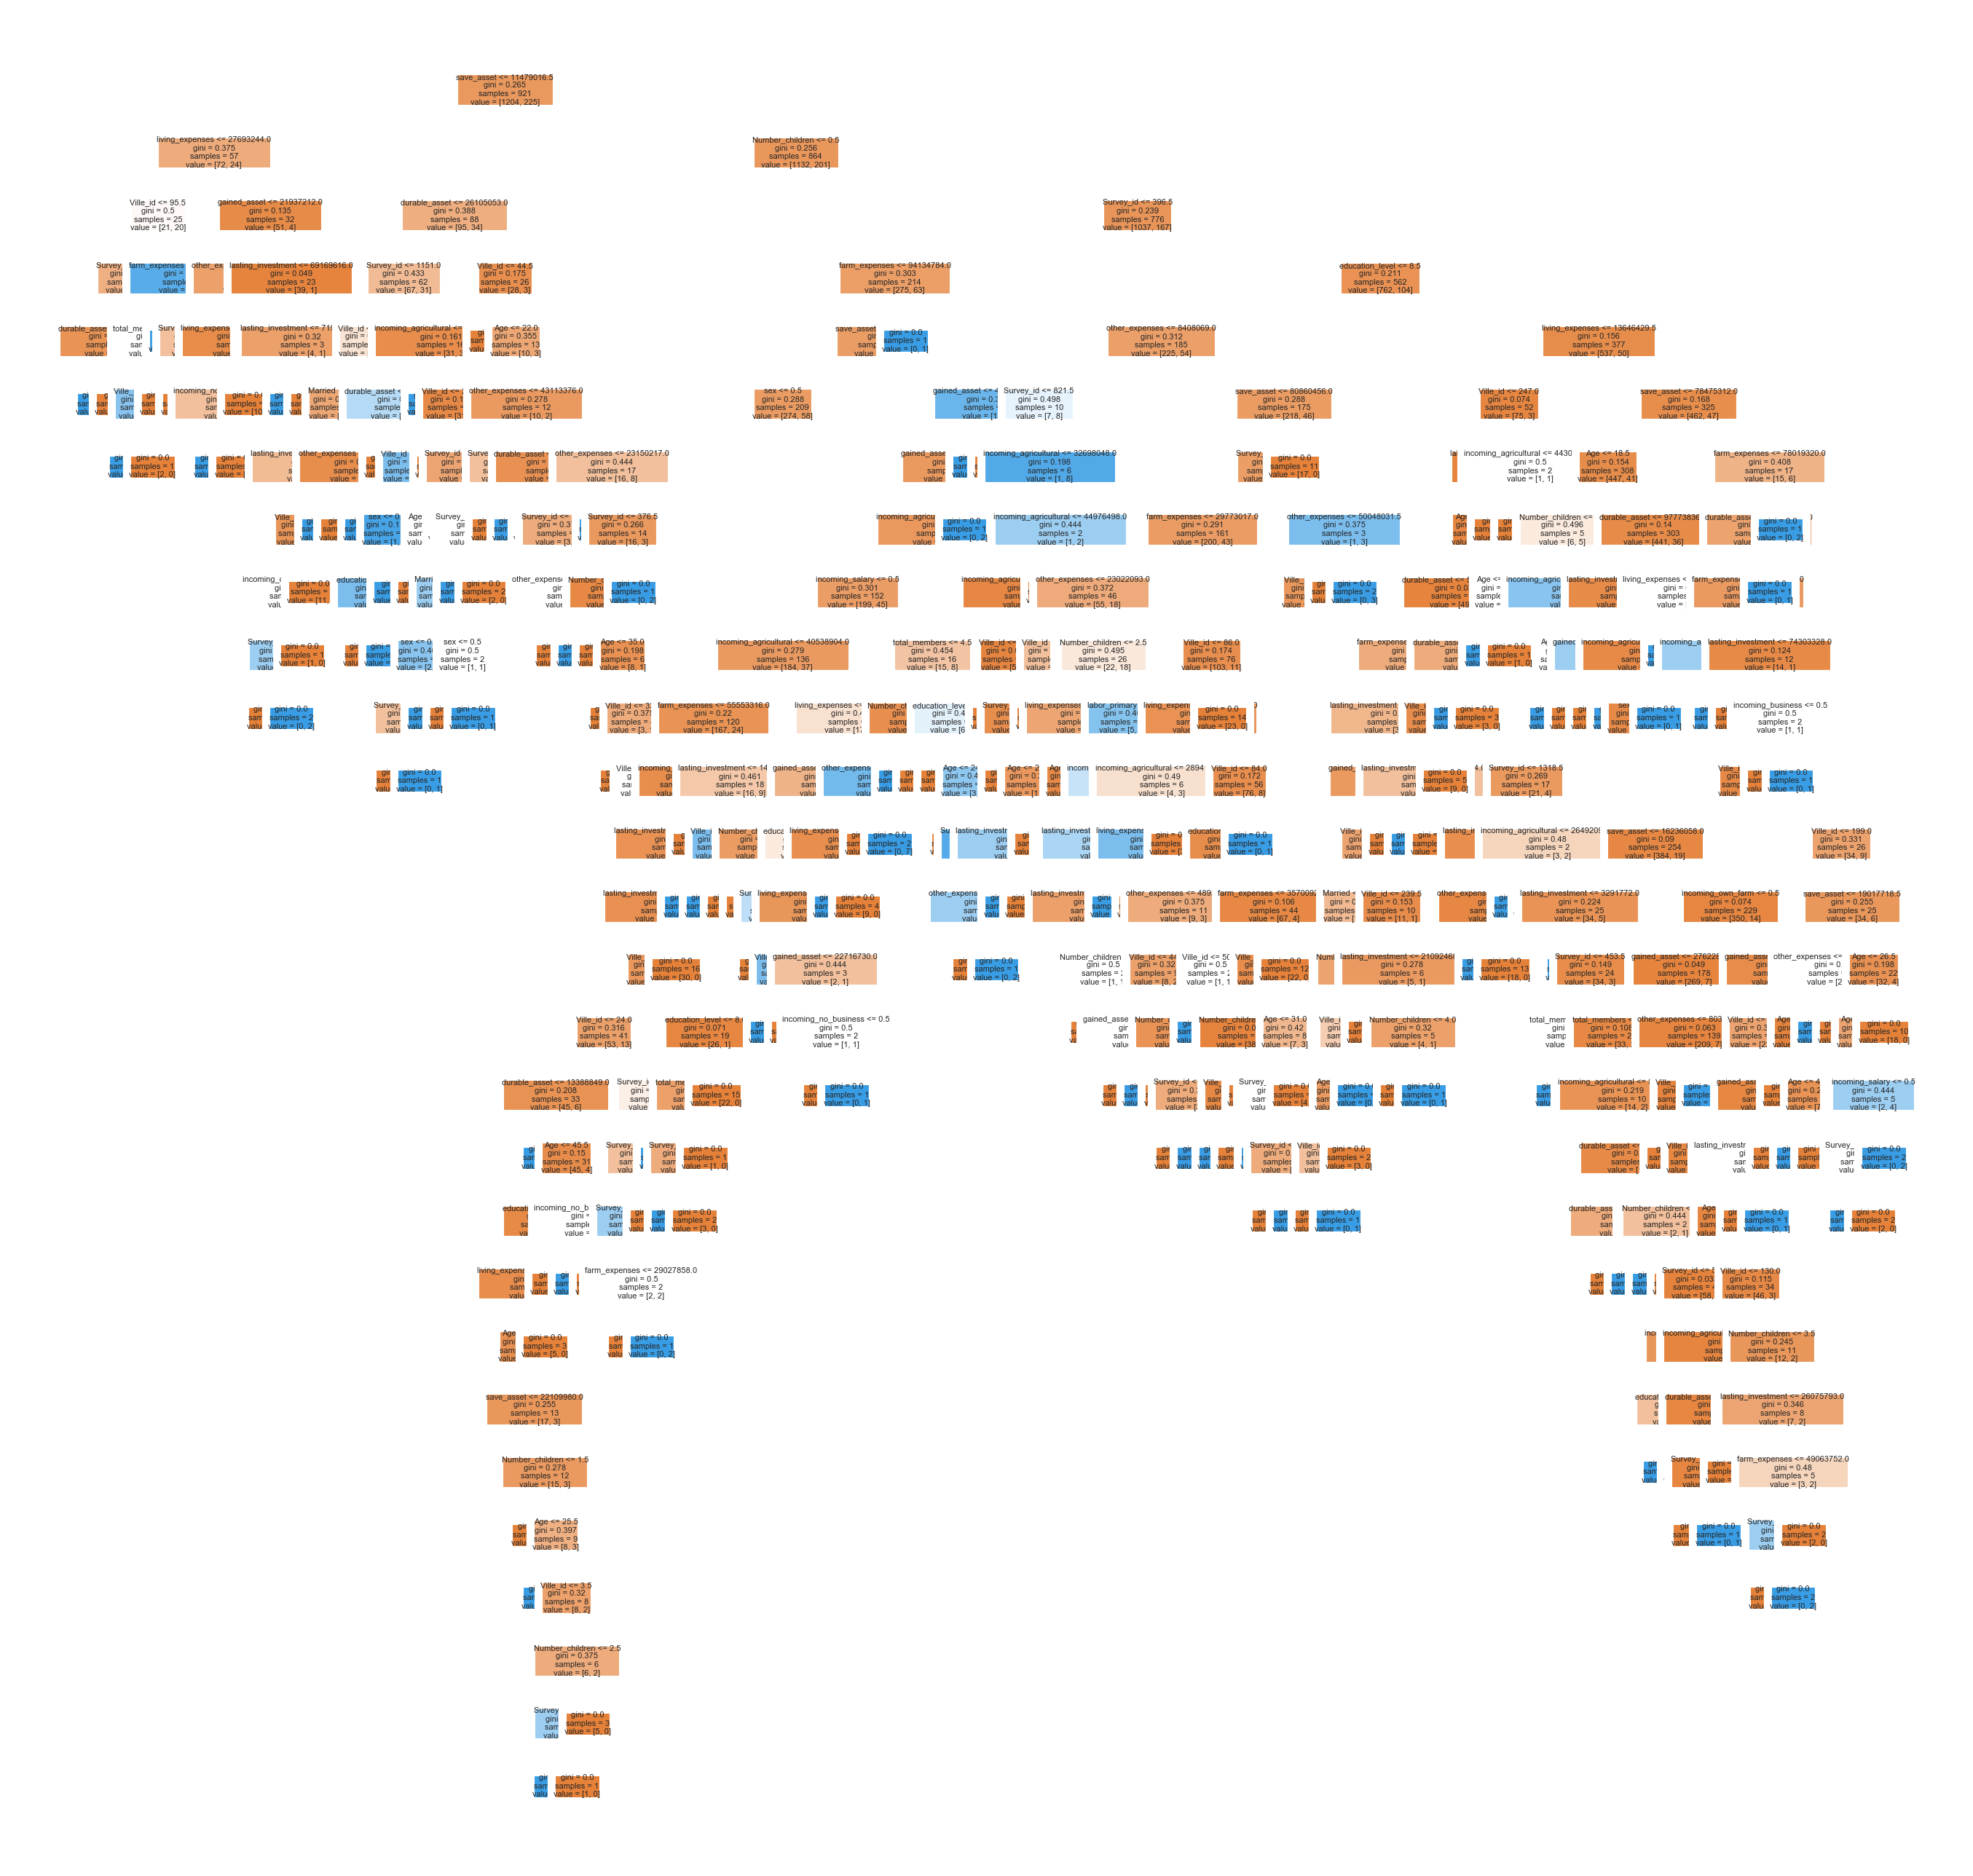

In [50]:
estimator = fit.estimators_[5]
from sklearn import tree
# Export as dot file


fn=df.drop(columns=['depressed', 'no_lasting_investmen']).columns
cn=df.drop(columns=['depressed', 'no_lasting_investmen']).columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(fit.estimators_[0],
               feature_names = fn, 
               filled = True);
fig.savefig('rf_individualtree.png')